<table style="margin: auto; background-color: white;">
    <tr>
      <td style="background-color: white;">
        <img src='https://drive.google.com/uc?export=view&id=1lgflViz1uefcvVW1iI57haB4M1bKsZtp' alt="drawing" width="200" />
      </td>
      <td style="background-color: white;">
        <img src='https://drive.google.com/uc?export=view&id=1S3xpVbkzpBAG51PyuRyIioecvZiHGSap' alt="drawing" width="200" />
      </td>
      <td style="background-color: white;">
        <img src='https://drive.google.com/uc?export=view&id=1lgflViz1uefcvVW1iI57haB4M1bKsZtp' alt="drawing" width="200" />
      </td>
      <td style="background-color: white;">
        <img src='https://drive.google.com/uc?export=view&id=1S3xpVbkzpBAG51PyuRyIioecvZiHGSap' alt="drawing" width="200" />
      </td>
      <td style="background-color: white;">
        <img src='https://drive.google.com/uc?export=view&id=1lgflViz1uefcvVW1iI57haB4M1bKsZtp' alt="drawing" width="200" />
      </td>
      <td style="background-color: white;">
        <img src='https://drive.google.com/uc?export=view&id=1S3xpVbkzpBAG51PyuRyIioecvZiHGSap' alt="drawing" width="200" />
      </td>
    </tr>
</table>

#Description of datasets

In [1]:
!git clone https://github.com/PatriciaLucas/Fuzzy-Causal-LLM.git

Cloning into 'Fuzzy-Causal-LLM'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 81 (delta 21), reused 5 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (81/81), 4.09 MiB | 3.49 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append('Fuzzy-Causal-LLM')
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import math
from matplotlib.collections import PolyCollection

In [3]:
def print_autocorrelation(data, figsize):
  num_plots = data.shape[1]
  num_cols = 3
  num_rows = math.ceil(num_plots / num_cols)

  fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

  for i, column in enumerate(data.columns):
      row = i // num_cols
      col = i % num_cols
      plot_acf(data[column], ax=axes[row, col], color='black', vlines_kwargs={"colors": 'black'})
      axes[row, col].set_title(f'{column}')
      for item in axes[row, col].collections:
        if type(item)==PolyCollection:
            item.set_facecolor('black')

  for j in range(num_plots, num_rows * num_cols):
      fig.delaxes(axes.flatten()[j])

  plt.tight_layout()
  plt.show()

# Economic Domain Dataset

### General Description

Source: [download link](https://query.data.world/s/72gews5w3c7oaf7by5vp7evsasluia)

The dataset ECONOMIC is used to forecast daily average indices that approximately reflect the state of financial markets. In addition to the average index, other variables include the opening price, highest price, lowest price, closing price, and trading volume for each business day.

| Dataset       | Granularity   | Number of Samples | Number of Variables | Target                                      |
|---------------|---------------|-------------------|----------------------|---------------------------------------------|
| ECONOMIC   | day           | 2,970             | 6                    | Average Bitcoin index in USD                |

In [4]:
data = pd.read_csv('/content/Fuzzy-Causal-LLM/Datasets/ECONOMICS_1.csv')
data.describe()

,Open,High,Low,Close,Volume,AVG
count,2960.000000,2960.000000,2960.000000,2960.000000,2.960000e+03,2960.000000
mean,1381.630958,1431.532988,1324.157715,1383.972194,1.428511e+08,1380.323464
std,2910.877629,3028.513773,2762.818332,2912.553940,4.177715e+08,2902.084413
min,0.049510,0.049510,0.010000,0.049510,0.000000e+00,0.049510
25%,11.437500,11.790000,10.942500,11.495000,4.269158e+05,11.453125
50%,282.414994,290.264999,274.375000,282.625000,8.026490e+06,282.834996
75%,704.342515,720.897506,679.477509,704.770005,3.364020e+07,703.273121
max,19346.599609,19870.619141,18750.910156,19345.490234,6.245732e+09,19258.459961


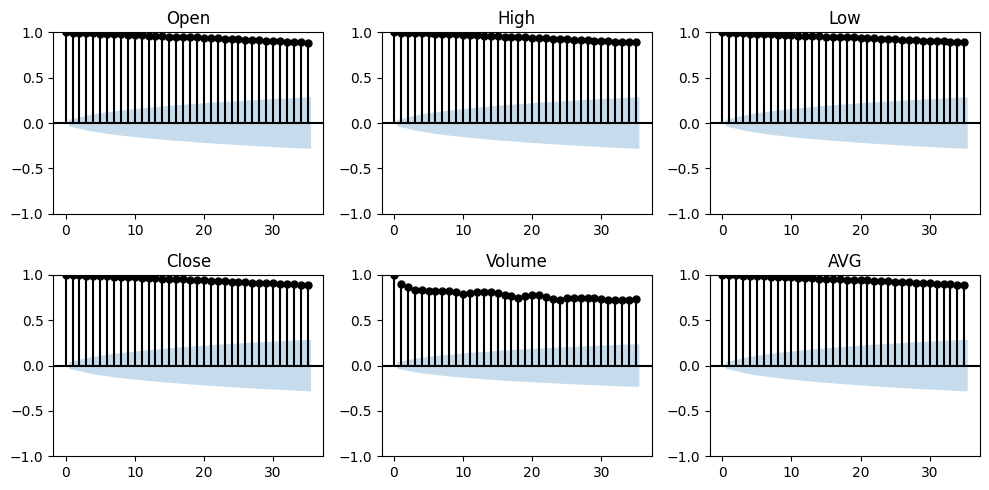

In [5]:
print_autocorrelation(data.drop('Date', axis=1), (10,5))

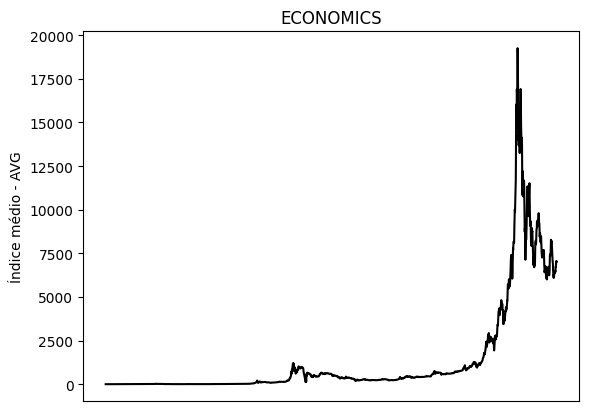

In [7]:
plt.plot(data['AVG'], color='black')
plt.title('ECONOMICS')
plt.xticks([])
plt.ylabel('Índice médio - AVG')
plt.show()

# Energy Domain Dataset

### General Description

Source: [download link](https://www.kaggle.com/datasets/mubashirrahim/wind-power-generation-data-forecasting)


The ENERGY dataset is used to forecast wind energy production.

| Dataset     | Granularity | Number of Samples | Number of Variables | Target                        |
|-------------|-------------|-------------------|----------------------|-------------------------------|
| ENERGY   | hour        | 43,802            | 9                    | Wind energy production        |

In [8]:
data = pd.read_csv('/content/Fuzzy-Causal-LLM/Datasets/ENERGY_1.csv')
data.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,47.862911,72.288744,38.569308,3.591147,6.284431,203.637329,203.343676,7.771795,0.405385
std,19.453691,16.852287,18.772110,1.649318,2.685216,96.371262,97.959852,3.569147,0.288322
min,-14.400000,18.000000,-17.100000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,32.100000,60.000000,24.300000,2.410000,4.380000,132.000000,130.000000,5.000000,0.148900
50%,47.300000,74.000000,38.100000,3.300000,6.080000,225.000000,226.000000,7.200000,0.347650
75%,64.500000,86.000000,54.700000,4.590000,7.990000,277.000000,278.000000,10.000000,0.659600
max,94.100000,100.000000,76.300000,13.450000,20.650000,360.000000,360.000000,29.200000,0.991300


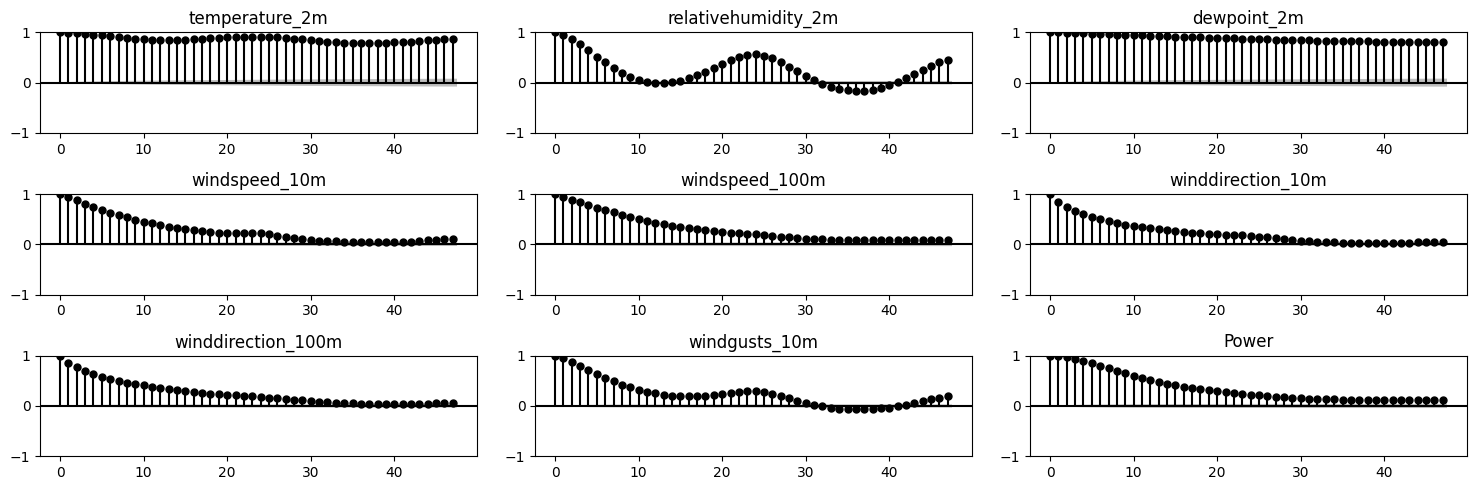

In [ ]:
print_autocorrelation(data, (15, 5))

# IoT Domain Datasets

### General Description


Source: [download link](https://www.sciencedirect.com/science/article/pii/S2352340924004219)

The dataset IOT is used to forecast energy consumption by household appliances.

| Dataset   | Granularity | Number of Samples | Number of Variables | Target                                     |
|-----------|-------------|-------------------|----------------------|--------------------------------------------|
| IOT     | minute      | 605,261           | 18                   | Energy consumption by household appliances |

In [9]:
data = pd.read_csv('/content/Fuzzy-Causal-LLM/Datasets/IOT_1.csv')
data.describe()

,active_power,current,voltage,reactive_power,apparent_power,power_factor,temp,feels_like,temp_min,temp_max,pressure,humidity,speed,deg
count,106902.000000,106902.000000,106902.000000,106902.000000,106902.000000,106902.000000,106902.000000,106902.000000,106902.000000,106902.000000,106902.000000,106902.000000,106902.000000,106902.000000
mean,234.431697,2.190899,123.915760,121.376407,270.293294,0.829596,15.663851,14.674360,14.650056,17.046441,1017.495781,48.074171,2.247942,149.675086
std,174.587795,1.484139,1.382606,68.998425,178.531903,0.119474,5.682720,5.737814,5.381837,5.442683,5.761962,21.372640,1.772327,119.643450
min,24.400000,0.300000,115.300000,22.190000,37.140000,0.201800,-5.560000,-6.130000,-5.560000,-5.560000,1002.000000,5.000000,0.000000,0.000000
25%,134.700000,1.400000,123.000000,67.110000,173.330000,0.708600,12.030000,10.730000,11.440000,13.140000,1013.000000,31.000000,0.890000,37.000000
50%,202.300000,1.910000,124.000000,103.380000,237.880000,0.863200,15.360000,14.520000,14.730000,16.480000,1017.000000,44.000000,2.030000,156.000000
75%,288.800000,2.680000,124.900000,169.210000,330.330000,0.937500,19.330000,18.420000,18.060000,20.920000,1021.000000,65.000000,3.110000,198.000000
max,2072.700000,18.660000,127.200000,1130.260000,2164.560000,0.999600,29.810000,28.110000,28.620000,29.810000,1035.000000,100.000000,9.260000,360.000000


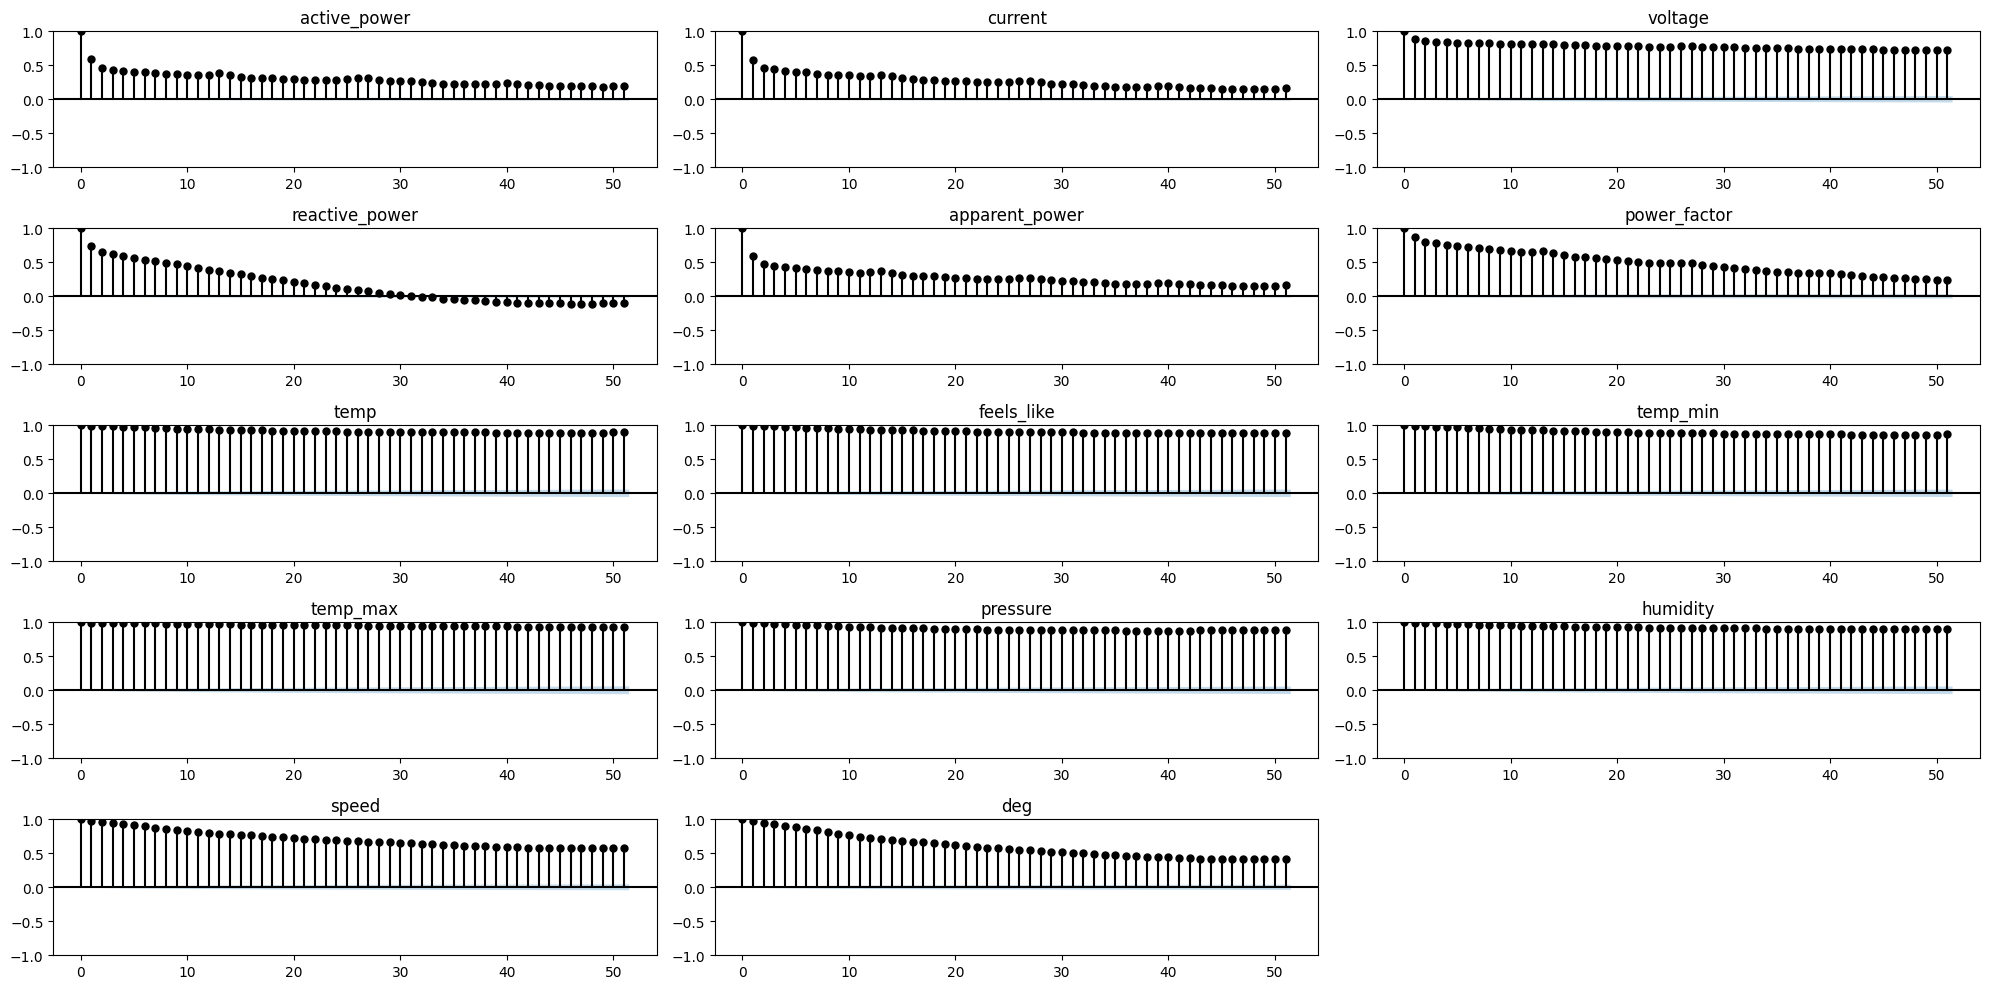

In [11]:
print_autocorrelation(data.drop('Date', axis=1), (20, 10))

# Climate Domain Datasets


### General Description


Source: [download link](https://github.com/petroniocandido/pyFTS/raw/8f20f3634aa6a8f58083bdcd1bbf93795e6ed767/pyFTS/data/SONDA_BSB.csv.bz2)

The dataset CLIMATIC is used to forecast global radiation.

| Dataset      | Granularity | Number of Samples | Number of Variables | Target                  |
|--------------|-------------|-------------------|----------------------|--------------------------|
| CLIMATICO_1  | hour        | 57,240            | 12                   | Global radiation         |

In [4]:
data = pd.read_csv('/content/Fuzzy-Causal-LLM/Datasets/CLIMATIC_1.csv')
data.describe()

,glo_avg,dir_avg,diff_avg,lw_avg,par_avg,lux_avg,tp_sfc,humid,press,rain,ws_10m,wd_10m
count,57238.000000,5.723800e+04,5.723800e+04,5.723800e+04,5.723800e+04,5.723800e+04,5.723800e+04,5.723800e+04,5.723800e+04,57238.000000,5.723800e+04,5.723800e+04
mean,505.314669,-2.637712e+15,3.268122e+15,3.474834e+15,-2.591406e+15,-2.966284e+15,3.754885e+15,-2.449505e+15,2.524883e+15,0.003203,-1.216222e+15,1.712681e+15
std,3625.302241,9.969644e+15,8.724713e+15,7.815541e+15,8.804887e+15,1.045592e+16,8.376093e+15,9.410053e+15,4.017310e+15,0.031855,9.781406e+15,8.656497e+15
min,-4098.000000,-7.573716e+16,-4.918894e+16,3.322000e+03,-8.179563e+16,-7.668797e+16,-4.915072e+16,-8.182204e+16,8.990000e+03,0.000000,-7.480244e+16,-7.461376e+16
25%,-2518.000000,-1.987851e+15,-9.120000e+02,3.815000e+03,-1.328636e+15,-1.609577e+15,1.899000e+03,-7.491595e+14,9.036100e+04,0.000000,-7.844895e+14,1.106250e+03
50%,-1084.000000,-2.040000e+02,2.531500e+03,3.959000e+03,0.000000e+00,0.000000e+00,2.209000e+03,8.610000e+02,9.053100e+04,0.000000,6.030000e+02,2.544000e+03
75%,2928.000000,1.805000e+03,3.303116e+15,3.495165e+15,5.029000e+03,1.588750e+03,1.876373e+15,9.340000e+02,8.992521e+15,0.000000,1.699000e+03,3.476000e+03
max,14880.000000,7.970994e+16,7.524747e+16,5.119404e+16,7.883658e+16,7.614072e+16,7.755000e+16,7.976627e+16,9.110341e+15,1.270000,6.398594e+16,8.161523e+16


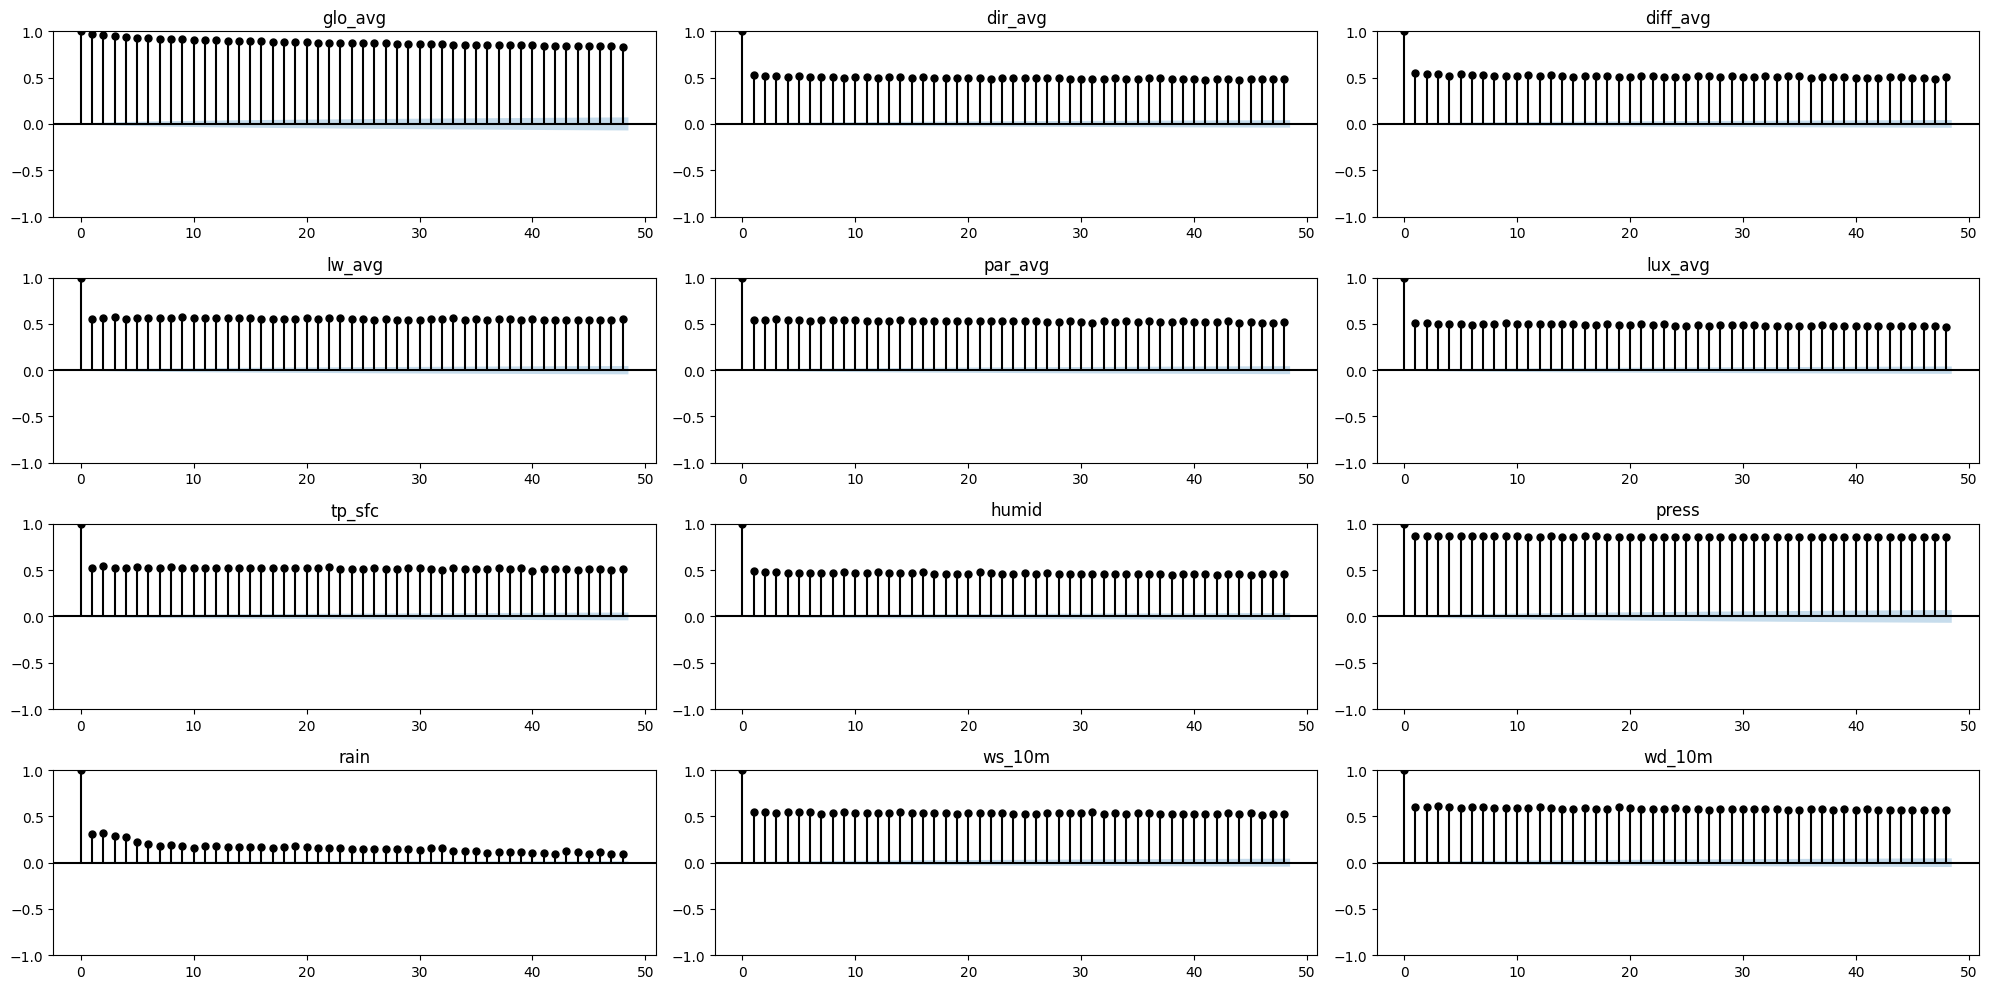

In [6]:
print_autocorrelation(data.drop('Date', axis=1), (20, 10))